In [9]:
import numpy as np
import  matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm

sys.path.insert(0, '../../Modules')
import erqScaling
import erqMedSpec
import os
def sampler(mean1, cov1, mean2, cov2, NG1, NG2):

    X1 = np.random.multivariate_normal(mean1, cov1, NG1)
    X2= np.random.multivariate_normal(mean2, cov2, NG2)

    X_all = np.concatenate((X1,X2), axis=0)
#     np.savetxt(name, X_all)
    return X_all, X1, X2

In [60]:
#  resampling for LOF score of each bin 

from sklearn.neighbors import LocalOutlierFactor as LOF
cc=-1
from matplotlib import cm
nBoot=100
k=50
outG1=[]
outG2=[]
cG2=[]
rin =[0, 1,   1.5, 2.5, 4.8, 5.7, 7]
rout=[1, 1.5, 2.5, 4.8, 5.7, 7, 100]
nBin = len(rin)
LOFScoresMedianBins=np.zeros([nBoot,nBin])
opening_angle= np.deg2rad(20)
ERQ_Vector = np.array([1,1,1])/np.sqrt(3)


In [63]:
for k in [70, 100, 150, 200]:
    for s in tqdm(range(nBoot)):

        # Grawing two Gaussian samples
        data=np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0], [0,0,1]], 30000)
        C = np.median(data, axis=0)
        data_norm = erqMedSpec.vectors_uniter(data-C)
        clf= LOF(n_neighbors=k,  n_jobs=-1)
        clf.fit_predict(data)
        LOFScores = -clf.negative_outlier_factor_
        theta = np.zeros([len(data)])
        for i in range(len(data)):
            theta[i] = np.arccos(np.dot(ERQ_Vector, data_norm[i,:]))

        # initializing 
        r = np.sqrt((data[:,0]-C[0])**2 + (data[:,1]-C[1])**2 + (data[:,2]-C[2])**2)
        for b in range(nBin):
            if (b==0):
                mask = (r>=rin[b]) & (r<=rout[b])
            else:
                mask = (r>=rin[b]) & (r<=rout[b]) & (theta<=opening_angle)
            if(np.sum(mask)>0):
                LOFScoresMedianBins[s,b]=np.median(LOFScores[mask])
            else:
                LOFScoresMedianBins[s,b]=np.nan
                
    np.savetxt('3D-1G-LOFScoresMedianBins-k-%d.dat'%k, LOFScoresMedianBins)

100%|██████████| 100/100 [02:12<00:00,  1.33s/it]


In [ ]:

import seaborn as sns
from scipy import stats 
for k in [40, 50, 100, 150]:
    P_all =[]
    med_bin=[]
    width= []
    for b in range(nBin):
        N, bins, patch=plt.hist(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], bins=10)
        med_bin.append((bins[:-1] + bins[1:])/2)
        width.append(bins[1] - bins[0])
        P_all.append(N/np.sum(N))
        plt.clf()
        plt.cla()
        l, u, LOFScoreMedian = np.zeros(nBin),  np.zeros(nBin),  np.zeros(nBin)
    for b in range(nBin):
        
        l[b]= np.percentile(DistLOFMedBin[:,b],32)
        u[b]= np.percentile(DistLOFMedBin[:,b],68)
        LOFScoreMedian[b] = np.median(DistLOFMedBin[:,b])       
        u[b]=u[b] - LOFScoreMedian[b]
        l[b]=LOFScoreMedian[b] - l[b]

        plt.bar(med_bin[b], P_all[b], width=width[b],  linewidth=0.5, alpha=.5, 
                label=r'Bin %d: %.1f$\sigma$<r<%.1f$\sigma$'%(b+1, rin[b],rout[b]))
        
   
    plt.legend()
    plt.savefig('3D_LOF_MOK_PDF-G1-k%d.png'%k, dpi=200)
    plt.show()


In [ ]:
med_bin

k=70 b=0 l=1.438e-04 m=9.981e-01 u=1.652e-04
k=70 b=1 l=1.244e-03 m=1.003e+00 u=9.835e-04
k=70 b=2 l=1.394e-03 m=1.026e+00 u=2.912e-03
k=70 b=3 l=1.217e-02 m=1.173e+00 u=1.221e-02
k=70 b=4 l=5.083e-02 m=2.621e+00 u=1.386e-02
k=100 b=0 l=1.324e-04 m=9.971e-01 u=1.139e-04
k=100 b=1 l=9.722e-04 m=1.003e+00 u=1.830e-03
k=100 b=2 l=2.567e-03 m=1.030e+00 u=1.970e-03
k=100 b=3 l=1.443e-02 m=1.204e+00 u=1.184e-02
k=100 b=4 l=2.282e-01 m=2.886e+00 u=2.153e-01
k=150 b=0 l=1.299e-04 m=9.957e-01 u=1.324e-04
k=150 b=1 l=1.206e-03 m=1.004e+00 u=1.168e-03
k=150 b=2 l=2.094e-03 m=1.037e+00 u=3.503e-03
k=150 b=3 l=1.346e-02 m=1.224e+00 u=1.578e-02
k=150 b=4 l=0.000e+00 m=2.613e+00 u=0.000e+00
k=200 b=0 l=1.395e-04 m=9.946e-01 u=1.323e-04
k=200 b=1 l=1.878e-03 m=1.005e+00 u=1.003e-03
k=200 b=2 l=3.553e-03 m=1.045e+00 u=2.811e-03
k=200 b=3 l=1.517e-02 m=1.248e+00 u=9.613e-03
k=200 b=4 l=6.433e-02 m=2.805e+00 u=4.452e-02


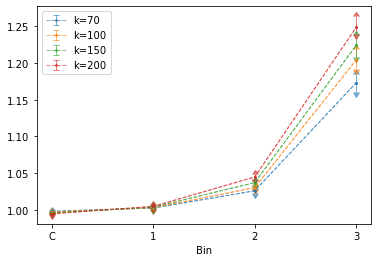

In [64]:
# Plotting 2D Mock LOF error bars 
r1=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
r2=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
from scipy import stats 
P_all =[]
med_bin=[]
width= []
c= ['C0', 'C1', 'C2', 'C3', 'C4']
cind=-1
for k in [70, 100, 150, 200]:
    DistLOFMedBin = np.loadtxt('3D-1G-LOFScoresMedianBins-k-%d.dat'%k)
    l, u, LOFScoreMedian = np.zeros(nBin),  np.zeros(nBin),  np.zeros(nBin)
    for b in range(nBin-2):
        
        l[b]= np.percentile(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b],32)
        u[b]= np.percentile(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b],68)
        LOFScoreMedian[b] = np.median(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b])       
        u[b]=u[b] - LOFScoreMedian[b]
        l[b]=LOFScoreMedian[b] - l[b]
        print('k=%d b=%d l=%.3e m=%.3e u=%.3e'%(k, b, l[b],LOFScoreMedian[b],u[b]))
#         u[b] = np.percentile(DistLOFMedBin[:,b],95) - LOFScoreMedian[b]
#         l[b] = -np.percentile(DistLOFMedBin[:,b],5) + LOFScoreMedian[b]

#     plt.errorbar(['C', '1', '2', '3', '4', '5', '6'], LOFScoreMedian, 
#                  yerr=e,marker='o', lw=2, ls='-',
#              markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])                       
    cind+=1
    plt.errorbar(['C', '1', '2', '3'], LOFScoreMedian[0:4], 
                 yerr=l[0:4], uplims=False, lolims=True, marker='o', lw=1, ls='--',
             markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
    plt.errorbar(['C', '1', '2', '3'], LOFScoreMedian[0:4], 
                 yerr=u[0:4], uplims=True, lolims=False, marker='o', lw=1, ls='--',
             markersize=2, alpha =0.6, c=c[cind])
plt.xlabel('Bin')
plt.legend()
plt.savefig('LOF_MOK_3D-1G-errorbar.png', dpi=200, bbox_inches='tight')
plt.show()


In [65]:
! cp LOF_MOK_3D-1G-errorbar.png ../../../erqPaper/fig
